##Clustering Assignment
### Comparitive performance study of different clustering algorithms using different pre-processing techniques with different numbers of clusters on different evaluation parameters

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['Class'] + [f'Feature_{i}' for i in range(1, 14)]
df = pd.read_csv(url, header=None, names=columns)

In [ ]:
df

,Class,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
X = df.drop('Class', axis=1)

In [ ]:
c = [3, 4, 5]
methods = ['No Processing', 'Normalized', 'Transformed', 'PCA', 'T+N', 'T+N+PCA']
res = []

In [ ]:
#pre-processing functions using different pre-rpocesing methods
def normalize(X): return StandardScaler().fit_transform(X)
def transform(X): return PowerTransformer().fit_transform(X)
def pca(X, n=2): return PCA(n_components=n).fit_transform(X)

In [ ]:
#evaluation function  using different evaluation metrics
def evaluate(X, labels):
    if len(set(labels)) < 2 or len(set(labels)) == len(labels):
        return np.nan, np.nan, np.nan  # invalid clustering
    return (
        silhouette_score(X, labels),
        calinski_harabasz_score(X, labels),
        davies_bouldin_score(X, labels)
    )

In [ ]:
#functions for clustering
def kmeans(X, c): return KMeans(n_clusters=c, random_state=42).fit_predict(X)
def hierarchical(X, c): return AgglomerativeClustering(n_clusters=c).fit_predict(X)
def meanshift(X): return MeanShift().fit_predict(X)

In [ ]:
for method in methods:
    if method == 'No Processing':
        X_new = X.values
    elif method == 'Normalized':
        X_new = normalize(X)
    elif method == 'Transformed':
        X_new = transform(X)
    elif method == 'PCA':
        X_new = pca(X)
    elif method == 'T+N':
        X_new = normalize(transform(X))
    elif method == 'T+N+PCA':
        X_new = pca(normalize(transform(X)))

    for count in c:
        row = {'Method': method, 'Clusters': count}

        # KMeans
        labels_k = kmeans(X_new, count)
        sil, cal, dave = evaluate(X_new, labels_k)
        row.update({'KMeans_Silhouette': sil, 'KMeans_Cal': cal, 'KMeans_Dave': dave})

        # Hierarchical
        labels_h = hierarchical(X_new, count)
        sil, cal, dave = evaluate(X_new, labels_h)
        row.update({'Hierarchical_Silhouette': sil, 'Hierarchical_Cal': cal, 'Hierarchical_Dave': dave})

        res.append(row)

In [ ]:
for method in methods:
    if method == 'PCA':  # 2D PCA doesn't work  for MeanShift
        continue

    if method == 'No Processing':
        X_new = X.values
    elif method == 'Normalized':
        X_new = normalize(X)
    elif method == 'Transformed':
        X_new = transform(X)
    elif method == 'T+N':
        X_new = normalize(transform(X))
    elif method == 'T+N+PCA':
        X_new = pca(normalize(transform(X)))

    row = {'Method': method, 'Clusters': 'MeanShift'}

    try:
        labels_m = meanshift(X_new)
        sil, cal, dave = evaluate(X_new, labels_m)
        row.update({'KMeans_Silhouette': np.nan, 'KMeans_Cal': np.nan, 'KMeans_Dave': np.nan})
        row.update({'Hierarchical_Silhouette': np.nan, 'Hierarchical_Cal': np.nan, 'Hierarchical_Dave': np.nan})
        row.update({'MeanShift_Silhouette': sil, 'MeanShift_Cal': cal, 'MeanShift_Dave': dave})
        res.append(row)
    except:
        pass

In [ ]:
results_df = pd.DataFrame(res)
print(results_df.head())

          Method Clusters  KMeans_Silhouette  KMeans_Cal  KMeans_Dave  \
0  No Processing        3           0.559582  497.004876     0.549558   
1  No Processing        4           0.566948  696.839036     0.548666   
2  No Processing        5           0.508180  745.197429     0.574419   
3     Normalized        3           0.284859   70.940008     1.389188   
4     Normalized        4           0.254228   52.758535     1.695418   

   Hierarchical_Silhouette  Hierarchical_Cal  Hierarchical_Dave  \
0                 0.564480        552.851712           0.535734   
1                 0.560673        670.625991           0.553574   
2                 0.507484        684.222613           0.551315   
3                 0.277444         67.647468           1.418592   
4                 0.225837         51.464146           1.788651   

   MeanShift_Silhouette  MeanShift_Cal  MeanShift_Dave  
0                   NaN            NaN             NaN  
1                   NaN            NaN      

In [ ]:
results_df

,Method,Clusters,KMeans_Silhouette,KMeans_Cal,KMeans_Dave,Hierarchical_Silhouette,Hierarchical_Cal,Hierarchical_Dave,MeanShift_Silhouette,MeanShift_Cal,MeanShift_Dave
0,No Processing,3,0.559582,497.004876,0.549558,0.564480,552.851712,0.535734,NaN,NaN,NaN
1,No Processing,4,0.566948,696.839036,0.548666,0.560673,670.625991,0.553574,NaN,NaN,NaN
2,No Processing,5,0.508180,745.197429,0.574419,0.507484,684.222613,0.551315,NaN,NaN,NaN
3,Normalized,3,0.284859,70.940008,1.389188,0.277444,67.647468,1.418592,NaN,NaN,NaN
4,Normalized,4,0.254228,52.758535,1.695418,0.225837,51.464146,1.788651,NaN,NaN,NaN
5,Normalized,5,0.183621,45.856456,1.912031,0.186742,43.679272,1.922855,NaN,NaN,NaN
6,Transformed,3,0.301240,73.111315,1.360973,0.289775,68.956059,1.385484,NaN,NaN,NaN
7,Transformed,4,0.255671,55.821385,1.769266,0.251731,53.130277,1.704426,NaN,NaN,NaN
8,Transformed,5,0.217388,46.594644,1.925101,0.229419,44.792548,1.809349,NaN,NaN,NaN
9,PCA,3,0.560265,497.573525,0.548732,0.565581,553.531654,0.534284,NaN,NaN,NaN


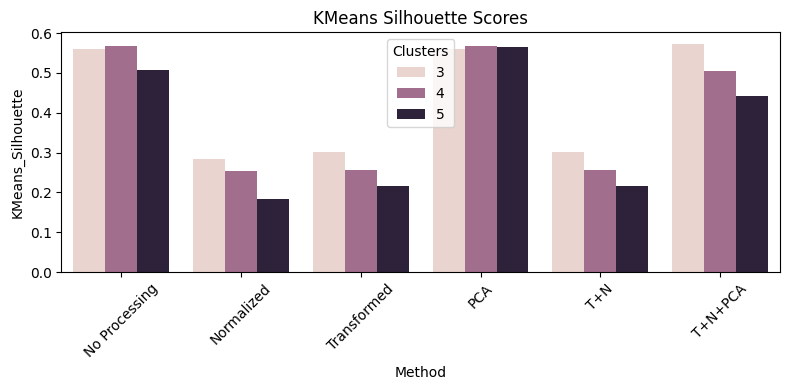

In [ ]:
def plot_metric(metric_col, title):
    plot_df = results_df.dropna(subset=[metric_col])
    plt.figure(figsize=(8,4))
    sns.barplot(data=plot_df, x="Method", y=metric_col, hue="Clusters")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_metric("KMeans_Silhouette", "KMeans Silhouette Scores")



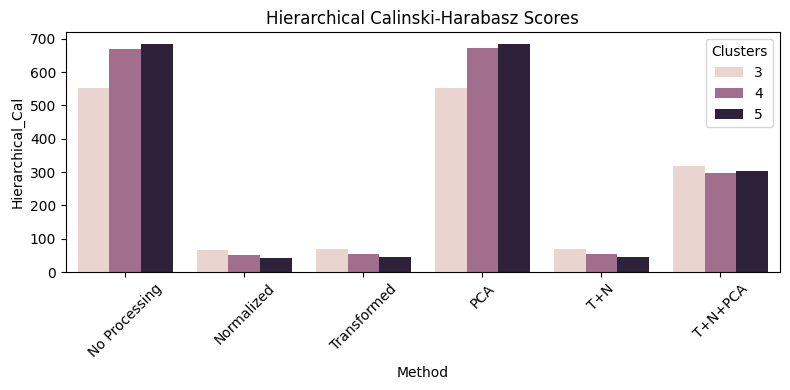

In [ ]:
plot_metric("Hierarchical_Cal", "Hierarchical Calinski-Harabasz Scores")

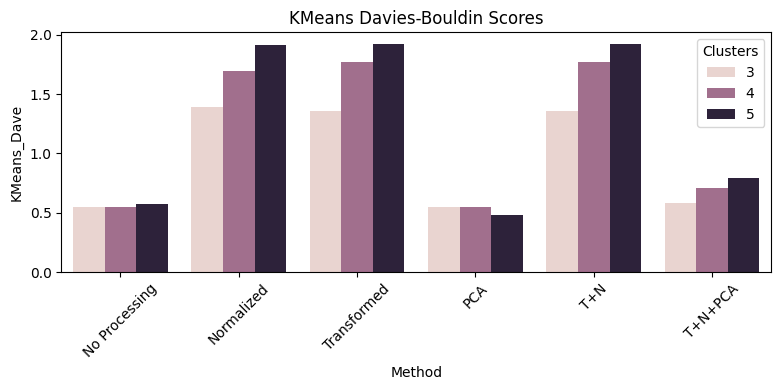

In [ ]:
plot_metric("KMeans_Dave", "KMeans Davies-Bouldin Scores")

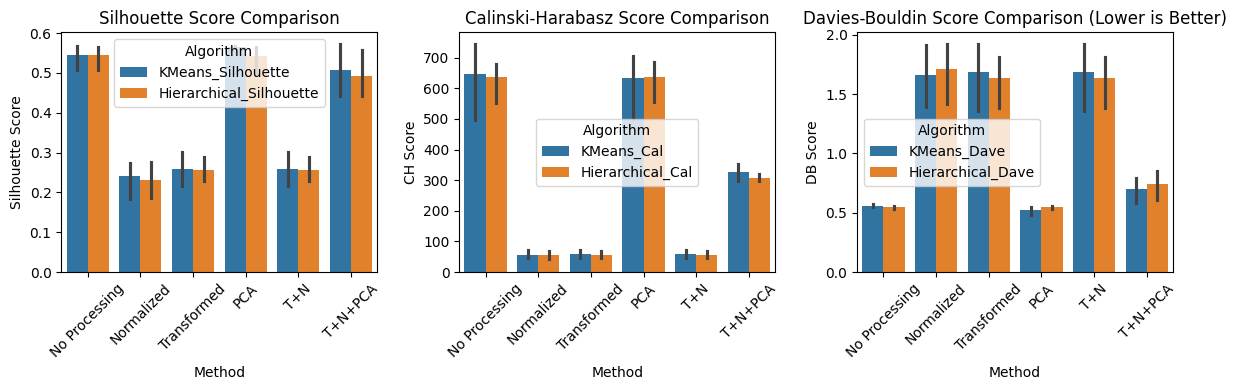

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # 1. Silhouette
df1 = results_df.dropna(subset=['KMeans_Silhouette', 'Hierarchical_Silhouette'])
melt1 = pd.melt(df1, id_vars=['Method', 'Clusters'],
                    value_vars=['KMeans_Silhouette', 'Hierarchical_Silhouette'],
                    var_name='Algorithm', value_name='Silhouette Score')
sns.barplot(data=melt1, x='Method', y='Silhouette Score', hue='Algorithm', ax=axes[0])
axes[0].set_title('Silhouette Score Comparison')
axes[0].tick_params(axis='x', rotation=45)

    #  2. Calinski-Harabasz
df2 = results_df.dropna(subset=['KMeans_Cal', 'Hierarchical_Cal'])
melt2 = pd.melt(df2, id_vars=['Method', 'Clusters'],
                    value_vars=['KMeans_Cal', 'Hierarchical_Cal'],
                    var_name='Algorithm', value_name='CH Score')
sns.barplot(data=melt2, x='Method', y='CH Score', hue='Algorithm', ax=axes[1])
axes[1].set_title('Calinski-Harabasz Score Comparison')
axes[1].tick_params(axis='x', rotation=45)

    # 3. Davies-Bouldin
df3 = results_df.dropna(subset=['KMeans_Dave', 'Hierarchical_Dave'])
melt3 = pd.melt(df3, id_vars=['Method', 'Clusters'],
                    value_vars=['KMeans_Dave', 'Hierarchical_Dave'],
                    var_name='Algorithm', value_name='DB Score')
sns.barplot(data=melt3, x='Method', y='DB Score', hue='Algorithm', ax=axes[2])
axes[2].set_title('Davies-Bouldin Score Comparison (Lower is Better)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##-> It can be noted from the graphs that for all three scores as well as clustering methods PCA gives the best performance
##-> Normalization or transformation alone doesnt give satisfactory results
##-> Transformation + normalization + PCA gives good results as well but not as much as PCA alone
##-> The scores given by raw data are almost equivalent to the scores given by the data with PCA applied

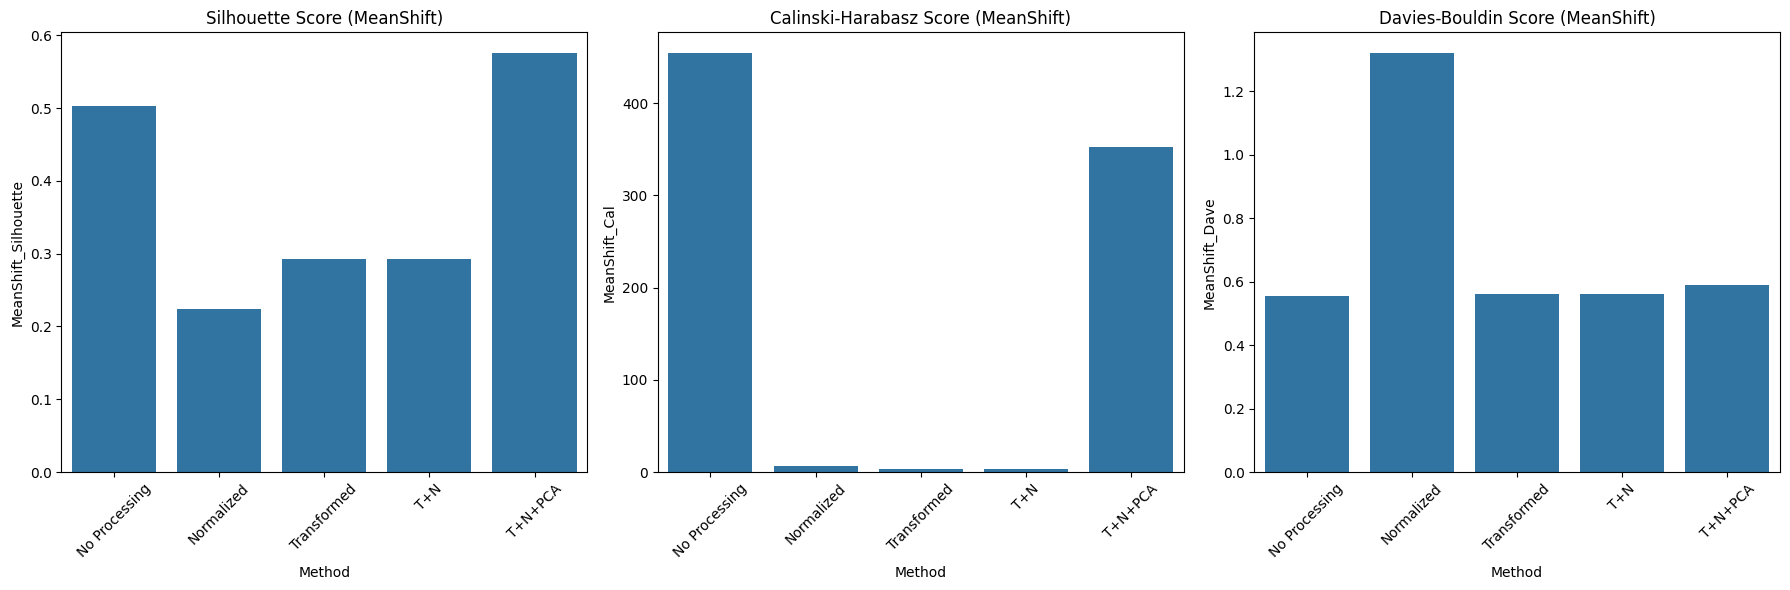

In [ ]:
 df = results_df[results_df['Clusters'] == 'MeanShift']
scores = ['MeanShift_Silhouette', 'MeanShift_Cal', 'MeanShift_Dave']
titles = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (score, title) in enumerate(zip(scores, titles)):
    sns.barplot(data=df, x='Method', y=score, ax=axes[i])
    axes[i].set_title(f'{title} Score (MeanShift)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Meanshift clustering has mixed results
## -> when it comes to silhoutte scores or Calinski Harabasz Scores the best result is given by T+N+PCA
## -> for Davies Bouldin Score the pre-processing methods perform almost similar except for Normalization which again gives unsatisfacory results
## -> it can be concluded that alone transformation and normalization don't give good results and hence it is best practice to include PCA in your pre-processing before clustering
